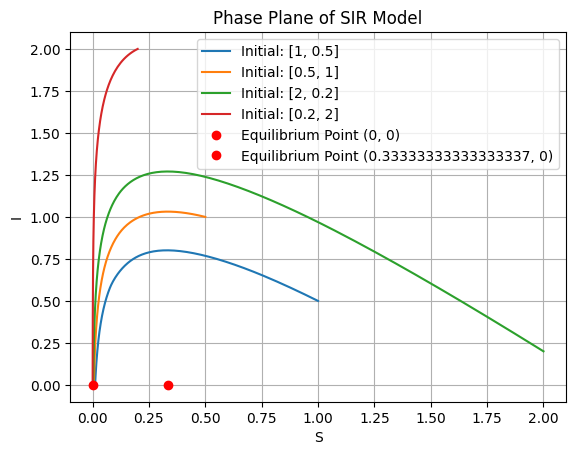

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parameters
beta = 0.3  # Transmission coefficient
gamma = 0.1  # Recovery rate

# Differential equations
def sir_model(t, z, beta, gamma):
    S, I = z
    dS_dt = -beta * S * I
    dI_dt = beta * S * I - gamma * I
    return [dS_dt, dI_dt]

# Time span and step size
time_span = [0, 50]  # Adjust as needed
step_size = 0.1

# Initial conditions for plotting trajectories
initial_conditions = [
    [1, 0.5],    # Initial condition 1
    [0.5, 1],    # Initial condition 2
    [2, 0.2],    # Initial condition 3
    [0.2, 2]     # Initial condition 4
]

# Equilibrium points
equilibrium_points = [(0, 0), (gamma / beta, 0)]

# Solve the differential equations for each initial condition
fig, ax = plt.subplots()

for initial_condition in initial_conditions:
    solution = solve_ivp(
        fun=lambda t, z: sir_model(t, z, beta, gamma),
        t_span=time_span,
        y0=initial_condition,
        t_eval=np.arange(time_span[0], time_span[1] + step_size, step_size)
    )
    ax.plot(solution.y[0], solution.y[1], label=f'Initial: {initial_condition}')

# Plot the equilibrium points
for point in equilibrium_points:
    ax.plot(point[0], point[1], 'ro', label=f'Equilibrium Point {point}')

# Set labels, title, and grid
ax.set(xlabel='S', ylabel='I', title='Phase Plane of SIR Model')
ax.legend()
ax.grid()

# Show the plot
plt.show()
